## 3F3 Module Experiment: Random Variables and Random Number Generation

Objectives: <br>

• To introduce the idea of random variables and functions of random variables <br>
• To study the Jacobian as used with random variables<br>
• To experiment with methods for non-uniform random number generation

### Task 1: Uniform and normal random variables 

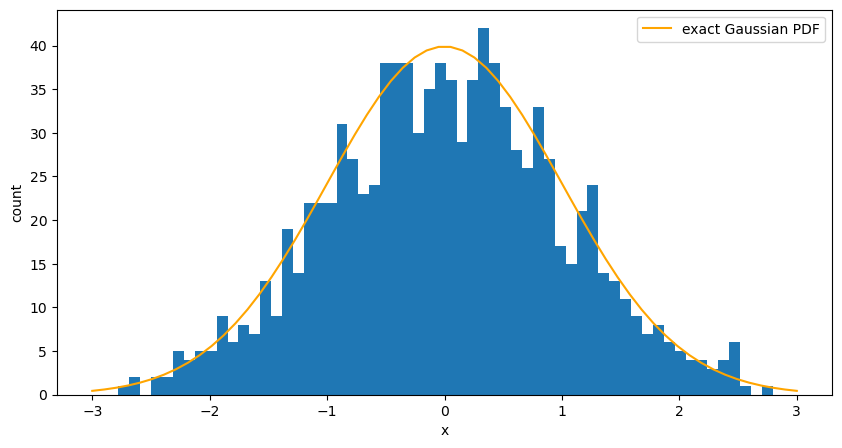

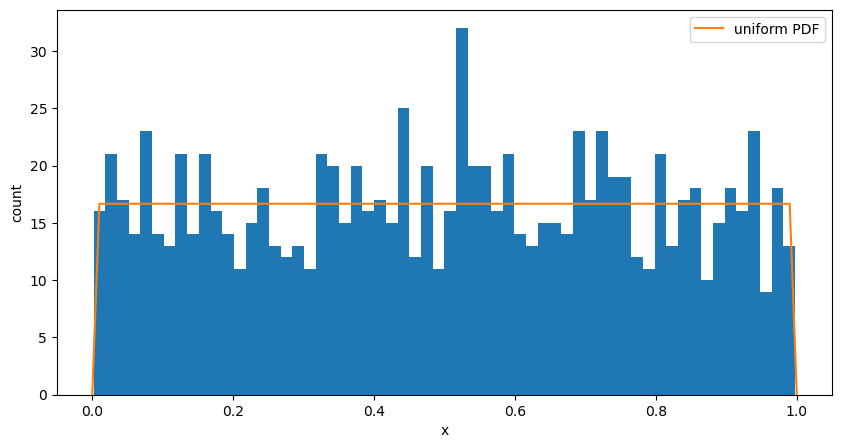

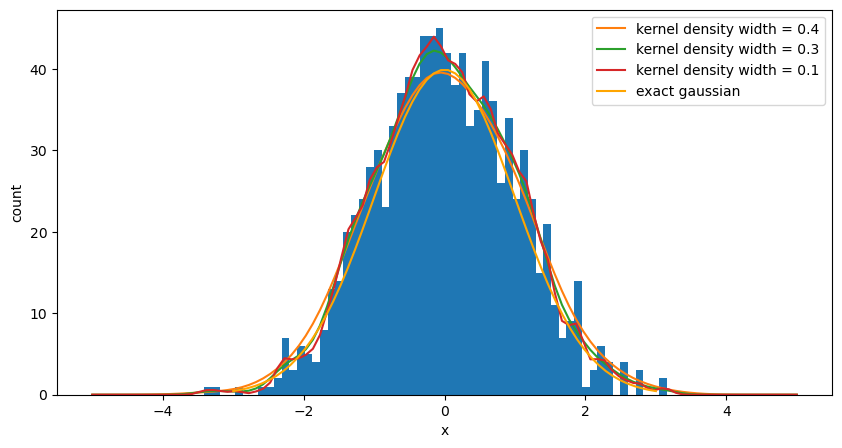

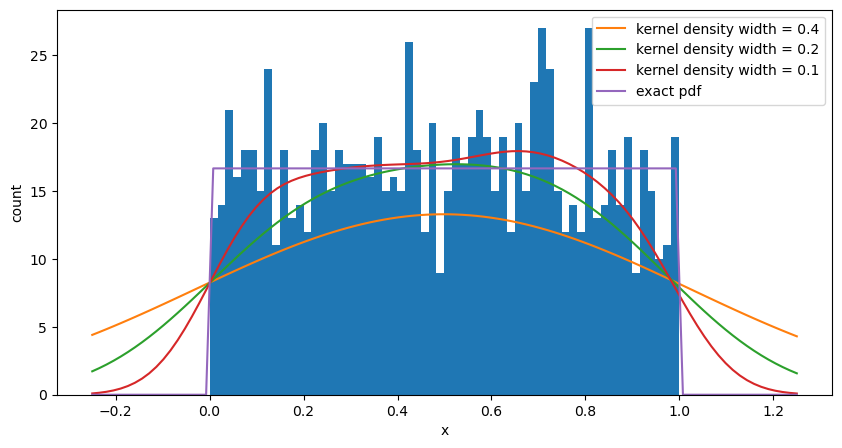

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

N = 1000
bins = 60


def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data"""
    def ksd(x_axis):
        def n_pdf(x, mu=0., sigma=1.): # normal pdf
            u = (x - mu) / abs(sigma)
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob] # each row is one x value
        return np.array(pdf)
    return ksd

def gaussian(mu, variance, ax, bins,color):
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, bins)
    #scale factor: no. of samples * bin width
    ax.plot(x, N*((max(x)-min(x))/bins)*stats.norm.pdf(x, mu, sigma), label = 'exact Gaussian PDF',color=color)

def horizontal(y,ax,c):
    ax.hlines(y,xmin=0.0, xmax=1, color = c, linestyle = '-') 

# Histogram of Gaussian random numbers overlaid on exact Gaussian curve (scaled): 

fig, ax = plt.subplots(figsize=(10,5))
x = np.random.randn(1000)
ax.hist(x, bins=bins) # number of bins
gaussian(0,1,ax,60,'orange')
#plt.title("Histogram of Gaussian random numbers overlaid on exact Gaussian curve (scaled)", fontsize = 10)
plt.xlabel('x', fontsize=10)
plt.ylabel('count', fontsize=10)
plt.legend()

# Histogram of Uniform random numbers overlaid on exact Uniform curve (scaled):

fig, ax = plt.subplots(figsize=(10,5))
x = np.random.rand(1000)
ax.hist(x, bins=bins)
x_values = np.linspace(0, 1, 100)
y = np.array([N/bins*1 if t < 1 and t > 0 else 0 for t in x_values])
ax.plot(x_values,y,label="uniform PDF")
plt.xlabel('x', fontsize=10)
plt.ylabel('count', fontsize=10)
plt.legend()

#plt.title("Histogram of uniform random numbers overlaid on exact uniform curve (scaled)", fontsize = 10)

# Kernel density estimate for Gaussian random numbers overlaid on exact Gaussian curve:

fig, ax = plt.subplots(figsize=(10,5))
x = np.random.randn(1000)
ax.hist(x, bins=bins)
ks_density = ksdensity(x, width=0.4)
# np.linspace(start, stop, number of steps)
x_values = np.linspace(-5., 5., 100)
ax.plot(x_values, N*((max(x)-min(x))/bins)*ks_density(x_values))
ks_density = ksdensity(x, width=0.2)
ax.plot(x_values, N*((max(x)-min(x))/bins)*ks_density(x_values))
ks_density = ksdensity(x, width=0.1)
ax.plot(x_values, N*((max(x)-min(x))/bins)*ks_density(x_values))
gaussian(0,1,ax,60,'orange')
#plt.title("Kernel density estimate for Gaussian random numbers overlaid on exact Gaussian curve", fontsize = 10)
plt.gca().legend(('kernel density width = 0.4','kernel density width = 0.3','kernel density width = 0.1','exact gaussian'))
plt.xlabel('x', fontsize=10)
plt.ylabel('count', fontsize=10)

# Kernel density estimate for Uniform random numbers overlaid on exact Gaussian curve:

fig, ax = plt.subplots(figsize=(10,5))
x = np.random.rand(1000)
ax.hist(x, bins=bins)
ks_density = ksdensity(x, width=0.4)
# np.linspace(start, stop, number of steps)
x_values = np.linspace(-0.25, 1.25, 100)
ax.plot(x_values, N/bins*ks_density(x_values))
ks_density = ksdensity(x, width=0.2)
ax.plot(x_values, N/bins*ks_density(x_values))
ks_density = ksdensity(x, width=0.1)
ax.plot(x_values, N/bins*ks_density(x_values))
y = np.array([N/bins*1 if t < 1 and t > 0 else 0 for t in x_values])
ax.plot(x_values,y)
#plt.title("Kernel density estimate for Uniform random numbers overlaid on exact Uniform curve", fontsize = 10)
plt.gca().legend(('kernel density width = 0.4','kernel density width = 0.2','kernel density width = 0.1','exact pdf'))
plt.xlabel('x', fontsize=10)
plt.ylabel('count', fontsize=10)




plt.show()

Advantages and disadvantages of the kernel density method compared with the histogram method for estimation  of  a probability  density from random samples:

ksdensity function is used to calculate the probability density function (PDF) by smoothing out the discrete data using convolution with a Gaussian kernel. ksdensity function only works well with normal distribution as the kernel used is Gaussian.

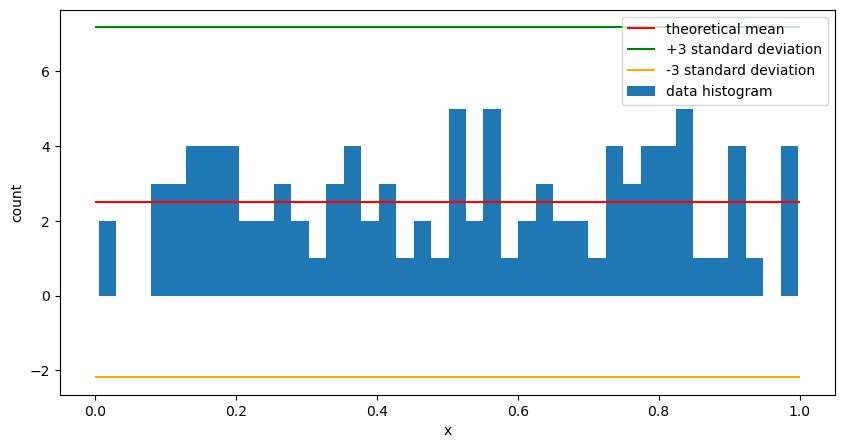

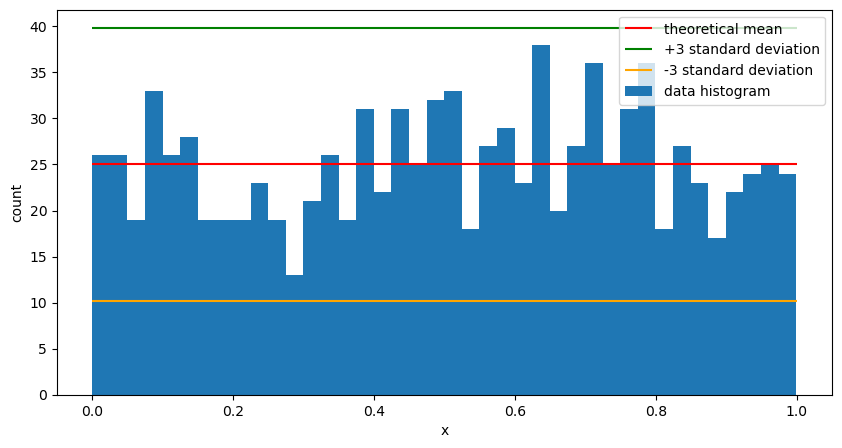

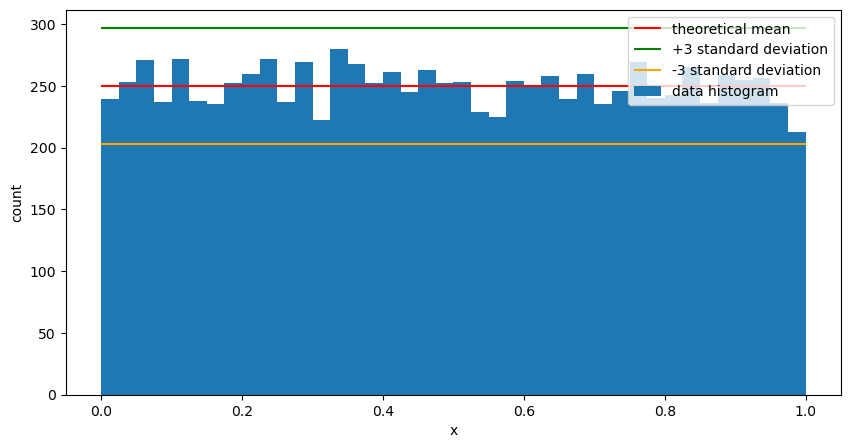

In [76]:
bins = 40

# theoretical mean and std of uniform distribution
def mean(N):
    mean = N*(1/bins)
    return mean
def std(N):
    std = math.sqrt(N*(1/bins)*(1-(1/bins)))
    return std

# Plot of normal distribution histograms for N = 100, N = 1000 and N = 10000 with theoretical mean and ±3 standard deviation lines

fig, ax = plt.subplots(figsize=(10,5))
N = 100
x = np.random.rand(N)
ax.hist(x, bins)
horizontal(N/bins*1,ax,'r')
horizontal((3*std(N)+mean(N))*1,ax,'green')
horizontal((-3*std(N)+mean(N))*1,ax,'orange')
#plt.title('Data histogram, theoretical mean and ±3 standard deviation lines for uniform distribution, N = 100', fontsize = 10)
plt.gca().legend(('theoretical mean','+3 standard deviation','-3 standard deviation','data histogram'))
plt.xlabel('x', fontsize=10)
plt.ylabel('count', fontsize=10)

fig, ax = plt.subplots(figsize=(10,5))
N = 1000
x = np.random.rand(N)
ax.hist(x, bins)
horizontal(N/bins*1,ax,'r')
horizontal((3*std(N)+mean(N))*1,ax,'green')
horizontal((-3*std(N)+mean(N))*1,ax,'orange')
#plt.title('Data histogram, theoretical mean and ±3 standard deviation lines for uniform distribution, N = 1000', fontsize = 10)
plt.gca().legend(('theoretical mean','+3 standard deviation','-3 standard deviation','data histogram'))
plt.xlabel('x', fontsize=10)
plt.ylabel('count', fontsize=10)

fig, ax = plt.subplots(figsize=(10,5))
N = 10000
x = np.random.rand(N)
ax.hist(x, bins)
horizontal(N/bins*1,ax,'r')
horizontal((3*std(N)+mean(N))*1,ax,'green')
horizontal((-3*std(N)+mean(N))*1,ax,'orange')
#plt.title('Data histogram, theoretical mean and ±3 standard deviation lines for uniform distribution, N = 10000', fontsize = 10)
plt.gca().legend(('theoretical mean','+3 standard deviation','-3 standard deviation','data histogram'))
plt.xlabel('x', fontsize=10)
plt.ylabel('count', fontsize=10)



plt.show()

Relationship btw histogram variance and bin probabilities using python CDF function

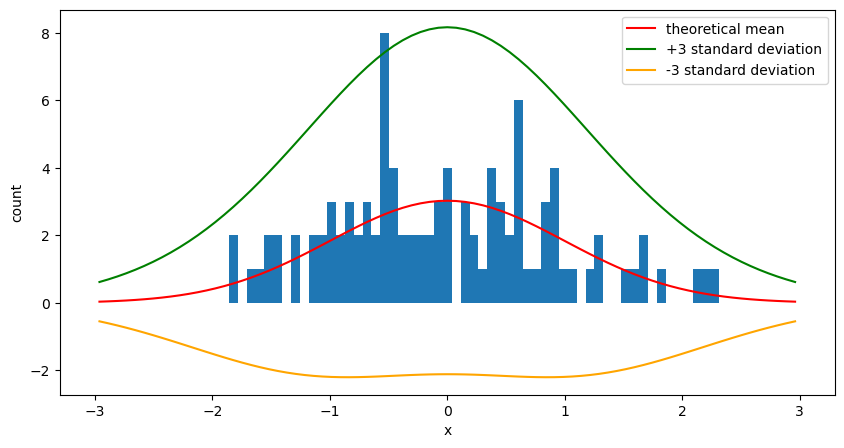

In [77]:
N = 100
num_bins = 80

bins = np.linspace(-3,3,num=num_bins)
bin_centers = 0.5*(bins[1:]+bins[:-1]) #set up x values
bin_width = bins[1]-bins[0]
scale = bin_width * N

# find prob for each interval of gaussian by finding diff of 2 cdfs
prob = np.array([stats.norm.cdf(centre + bin_width / 2) - stats.norm.cdf(centre - bin_width / 2) for centre in bin_centers])
# y values
mean = N*prob
# std = np.sqrt(N*(1/bins)*(1-(1/bins))) uniform std 
std = np.sqrt(N*(prob)*(1-(prob))) # guassian std

fig, ax = plt.subplots(figsize=(10,5))
x = np.random.randn(N)
ax.hist(x, bins)
# gaussian(0,1,ax,'red')
ax.plot(bin_centers,mean,color='red',label='theoretical mean')
ax.plot(bin_centers,mean+3*std,color='green',label='+3 standard deviation')
ax.plot(bin_centers,mean-3*std,color='orange',label='-3 standard deviation')


# graph labels
#plt.title("Data histogram, theoretical mean and ±3 standard deviation lines for Gaussian distribution, N = 100", fontsize = 10)
plt.xlabel('x', fontsize=10)
plt.ylabel('count', fontsize=10)
plt.gca().legend()

plt.show()

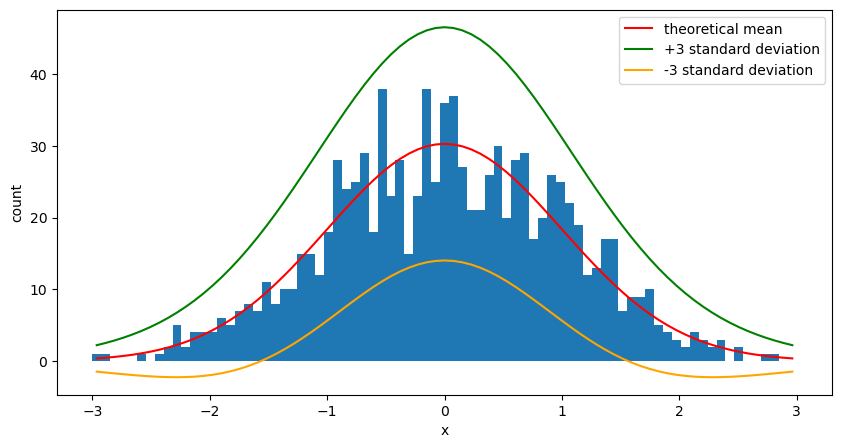

In [78]:
N = 1000
num_bins = 80

bins = np.linspace(-3,3,num=num_bins)
bin_centers = 0.5*(bins[1:]+bins[:-1]) #set up x values
bin_width = bins[1]-bins[0]
scale = bin_width * N

# find prob for each interval of gaussian by finding diff of 2 cdfs
prob = np.array([stats.norm.cdf(centre + bin_width / 2) - stats.norm.cdf(centre - bin_width / 2) for centre in bin_centers])
# y values
mean = N*prob
# std = np.sqrt(N*(1/bins)*(1-(1/bins))) uniform std 
std = np.sqrt(N*(prob)*(1-(prob))) # guassian std

fig, ax = plt.subplots(figsize=(10,5))
x = np.random.randn(N)
ax.hist(x, bins)
# gaussian(0,1,ax,'red')
ax.plot(bin_centers,mean,color='red',label='theoretical mean')
ax.plot(bin_centers,mean+3*std,color='green',label='+3 standard deviation')
ax.plot(bin_centers,mean-3*std,color='orange',label='-3 standard deviation')


# graph labels
#plt.title("Data histogram, theoretical mean and ±3 standard deviation lines for guassian distribution, N = 1000", fontsize = 10)
plt.xlabel('x', fontsize=10)
plt.ylabel('count', fontsize=10)
plt.gca().legend()

plt.show()

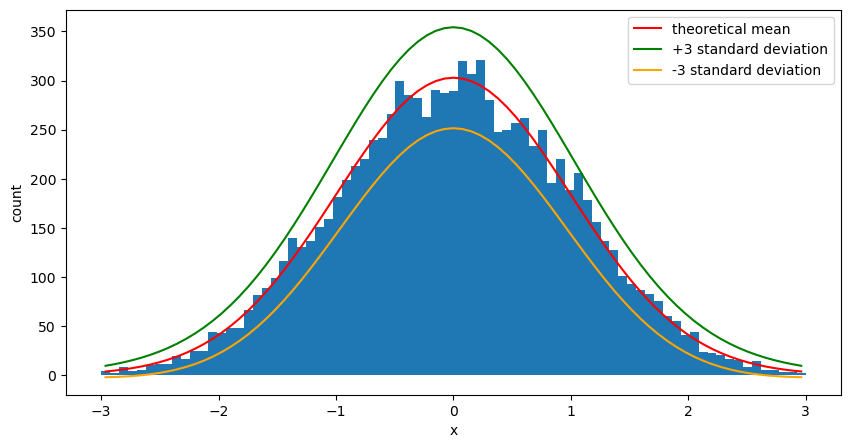

In [79]:
N = 10000
num_bins = 80

bins = np.linspace(-3,3,num=num_bins)
bin_centers = 0.5*(bins[1:]+bins[:-1]) #set up x values
bin_width = bins[1]-bins[0]
scale = bin_width * N

# find prob for each interval of gaussian by finding diff of 2 cdfs
prob = np.array([stats.norm.cdf(centre + bin_width / 2) - stats.norm.cdf(centre - bin_width / 2) for centre in bin_centers])
# y values
mean = N*prob
# std = np.sqrt(N*(1/bins)*(1-(1/bins))) uniform std 
std = np.sqrt(N*(prob)*(1-(prob))) # guassian std

fig, ax = plt.subplots(figsize=(10,5))
x = np.random.randn(N)
ax.hist(x, bins)
# gaussian(0,1,ax,'red')
ax.plot(bin_centers,mean,color='red',label='theoretical mean')
ax.plot(bin_centers,mean+3*std,color='green',label='+3 standard deviation')
ax.plot(bin_centers,mean-3*std,color='orange',label='-3 standard deviation')


# graph labels
# plt.title("Data histogram, theoretical mean and ±3 standard deviation lines for guassian distribution, N = 100", fontsize = 10)
plt.xlabel('x', fontsize=10)
plt.ylabel('count', fontsize=10)
plt.gca().legend()

plt.show()

### Task 2: Functions of random variables

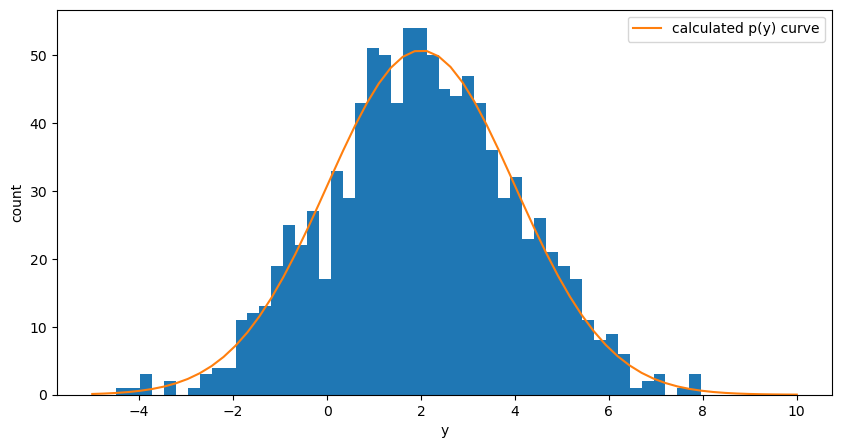

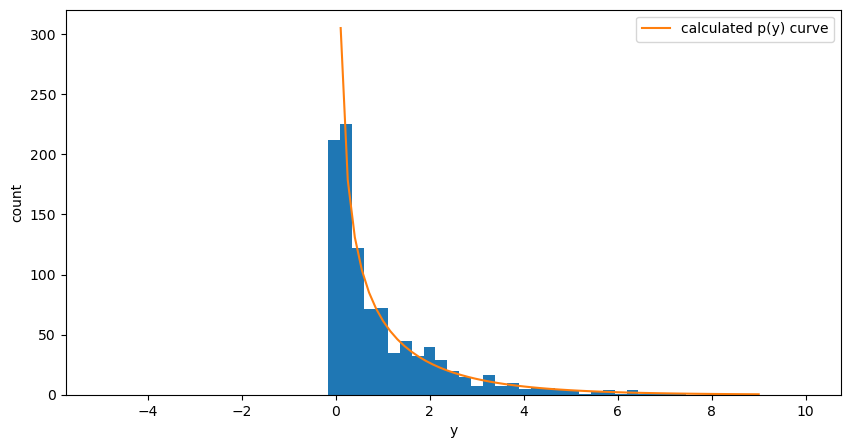

In [165]:
# transforming a large collection of random samples x(i) to give y(i) = f (x(i)), histogramming the resulting y samples, and overlaying a plot of your formula calculated using the Jacobian

a = 2
b = 2
N = 1000
num_bins = 60
bins = np.linspace(-5,10,num=num_bins)
bin_centers = 0.5*(bins[1:]+bins[:-1]) #set up x values
bin_width = bins[1]-bins[0]
scale = bin_width * N

# Plot normal distribution histogram
fig, ax = plt.subplots(figsize=(10,5))
x = np.random.randn(N)
y = x*a + b
ax.hist(y, bins = bins) 

# Plot theoretical gaussian pdf p(y) where new mean = b, new variance = a
gaus = stats.norm.pdf(bins,b,a)
ax.plot(bins,scale*gaus, label='calculated p(y) curve')
#plt.title("Histogram of y random numbers overlaid on calculated p(y) for y = ax+b", fontsize = 10)
plt.legend()
plt.xlabel('y', fontsize=10)
plt.ylabel('count', fontsize=10)



# histogramming of transformed random samples of p(x) = N (x|0, 1) and f (x) = x^2
fig, ax = plt.subplots(figsize=(10,5))
x = np.random.randn(N)
y = x**2
ax.hist(y, bins = bins)
# Plot theoretical pdf p(y)
x = np.linspace(0.1, 9, num_bins)
y = N*(bin_width)* 1/(np.sqrt(2*x*math.pi)) * math.e**(-x/2)
ax.plot(x,y, label='calculated p(y) curve')
#plt.title("Histogram of y random numbers overlaid on calculated p(y) for y = x^2", fontsize = 10)
plt.legend()
plt.xlabel('y', fontsize=10)
plt.ylabel('count', fontsize=10)


plt.show()

Consider p(x) = uniform distribution from 0 to 2pi, and f(x) = sin(x). Determine the PDF for f(x) using Jacobian formula and verify for transformed random samples

C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_26156\1652597319.py:15: RuntimeWarning: invalid value encountered in sqrt
  p_y = 1/((np.pi)*(np.sqrt(1-bin_centers**2)))


Text(0, 0.5, 'count')

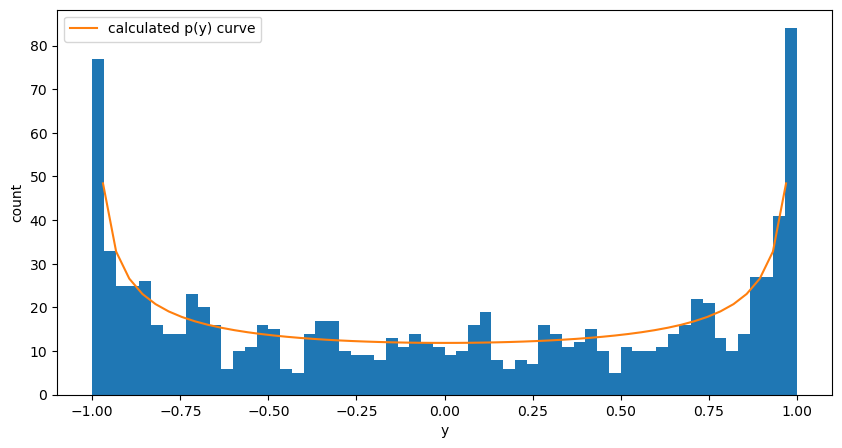

In [169]:
N = 1000
num_bins = 60
bins = np.linspace(-1.1,1.1,num=num_bins)
bin_centers = 0.5*(bins[1:]+bins[:-1]) #set up x values
bin_width = bins[1]-bins[0]
scale = bin_width * N

# Plot normal distribution histogram
fig, ax = plt.subplots(figsize=(10,5))
x = 2*math.pi*np.random.rand(N)
y = np.sin(x)
ax.hist(y, bins = num_bins) 

# Plot theoretical pdf p(y)
p_y = 1/((np.pi)*(np.sqrt(1-bin_centers**2)))
ax.plot(bin_centers,scale*p_y, label='calculated p(y) curve')
#plt.title("Histogram of y random numbers overlaid on calculated p(y) for y = sin(x)", fontsize = 10)
plt.legend()
plt.xlabel('y', fontsize=10)
plt.ylabel('count', fontsize=10)

Now consider clipping or a limited sin function where f(x) = y = min(sin(x),0.7)

C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_26156\1485023211.py:17: RuntimeWarning: invalid value encountered in sqrt
  p_y = 1/((np.pi)*(np.sqrt(1-bin_centers**2)))


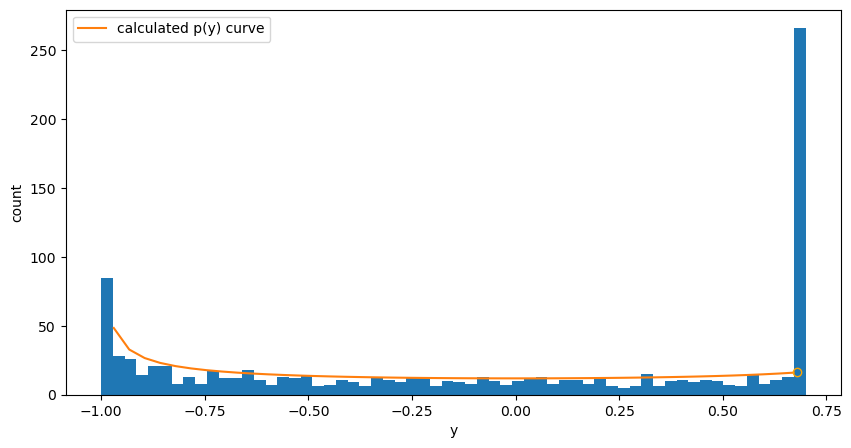

In [152]:
N = 1000
num_bins = 60
bins = np.linspace(-1.1,1.1,num=num_bins)
bin_centers = 0.5*(bins[1:]+bins[:-1]) #set up x values
bin_width = bins[1]-bins[0]
scale = bin_width * N

# Plot normal distribution histogram
fig, ax = plt.subplots(figsize=(10,5))
x = 2*math.pi*np.random.rand(N)
y = np.sin(x)
y[y>0.7]=0.7
ax.hist(y, bins = num_bins) 

# Plot theoretical gaussian pdf p(y)
bin_centers = bin_centers[bin_centers <= 0.7]
p_y = 1/((np.pi)*(np.sqrt(1-bin_centers**2)))
ax.plot(bin_centers,scale*p_y, label='calculated p(y) curve')

plt.plot([0.68], [37*1/((np.pi)*(np.sqrt(1-0.7**2)))], marker='o', markerfacecolor='none', markeredgewidth=1, markeredgecolor='orange')
#plt.title("Histogram of y random numbers overlaid on calculated p(y) for y = min(sin(x),0.7)", fontsize = 10)
plt.legend()
plt.xlabel('y', fontsize=10)
plt.ylabel('count', fontsize=10)

plt.show()

### Task 3: Inverse CDF method

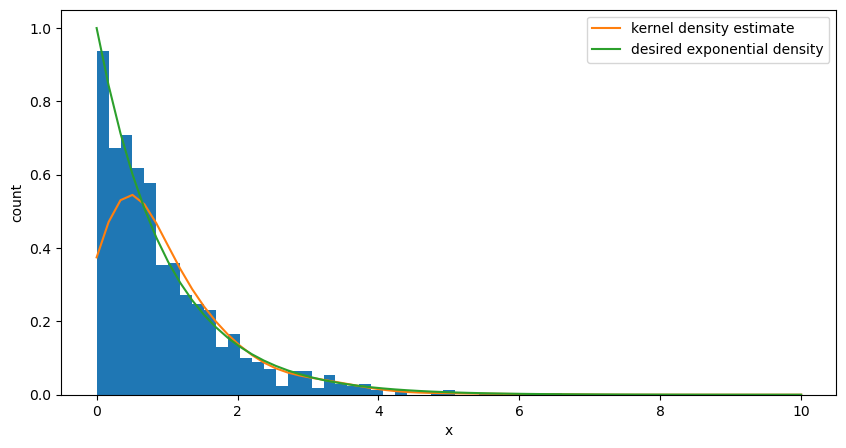

In [136]:
# inverse CDF method for generating samples from the exponential distribution

N = 1000
num_bins = 60
bins=np.linspace(0,10,num=num_bins)
bin_width = bins[1]-bins[0]
scale_factor = N*bin_width

fig, ax = plt.subplots(figsize=(10,5))
x = np.random.rand(N)
y = -np.log(1-x)

# Plot histograms and kernel density estimates and overlay them on the desired exponential density
ax.hist(y, bins=bins,density=True) 
ks_density = ksdensity(y, width=0.4)
# np.linspace(start, stop, number of steps)
ax.plot(bins, ks_density(bins), label = 'kernel density estimate')

# actual exponential density
z = math.e**(-bins)
ax.plot(bins,z, label = 'desired exponential density')

plt.xlabel('x', fontsize=10)
plt.ylabel('count', fontsize=10)

plt.legend() 

#plt.title("Histogram and kernel density estimate overlaid on desired exponential density", fontsize = 10)

plt.show()

Estimate the mean and variance of the exponential distribution and verify them with theoretical values using Monte Carlo

In [273]:
mean = np.mean(y)
var = (np.sum(y**2-mean**2))/N
print(mean)
print(var)

1.0315066721095665
0.9707586826442792


Plotting squared error against number of Monte Carlo samples. This is done by averaging the error over lots of Monte Carlo estimates of mu from different samples of the transformed y

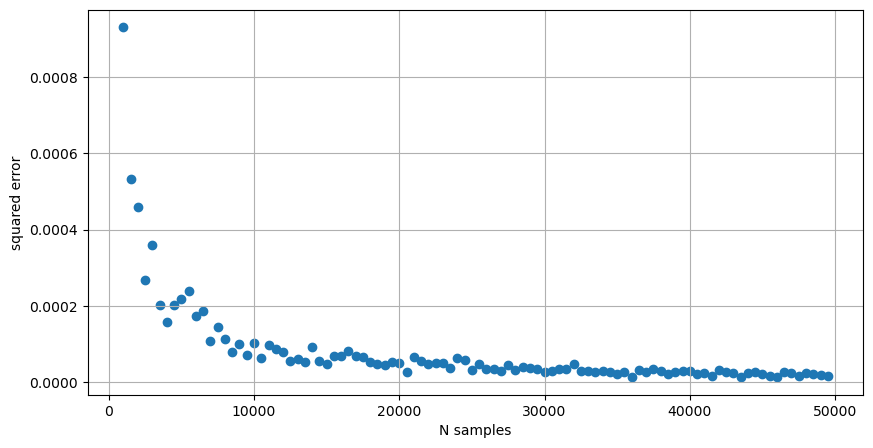

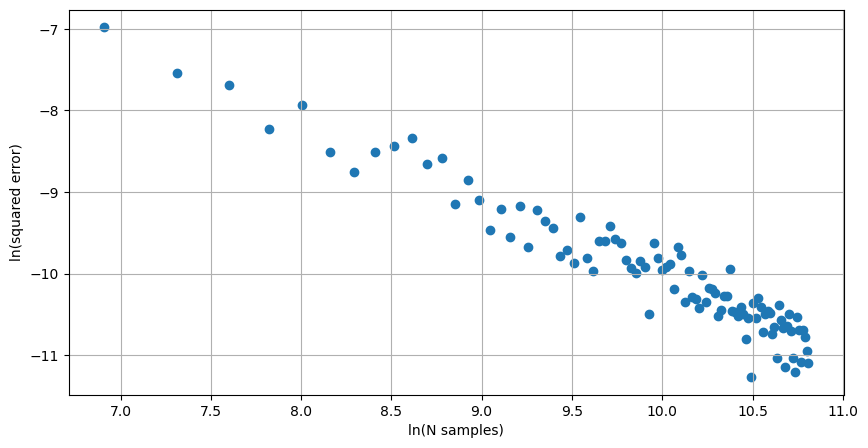

In [7]:
fig, ax = plt.subplots(figsize=(10,5))

N_samples = np.arange(1000,50000,500)
results = []

for N in N_samples:
    squared_error = 0
    for i in range(40):
        x = np.random.rand(N)
        y = -np.log(1-x)
        est_mean = np.mean(y)
        squared_error += (est_mean - 1) ** 2
    results.append(squared_error/40)


ax.scatter(N_samples,results)


y = 1/np.sqrt(N_samples)
# ax.plot(N_samples,0.006*y) # add some constant multiplier so scatter plot fits line plot

plt.xlabel('N samples', fontsize=10)
plt.ylabel('squared error', fontsize=10)

# plt.title("Plot of squared error against number of Monte Carlo samples", fontsize = 10)
plt.grid()


fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(np.log(N_samples),np.log(results))


plt.xlabel('ln(N samples)', fontsize=10)
plt.ylabel('ln(squared error)', fontsize=10)
plt.grid()

plt.show()

Task 4: Simulation from a 'difficult' density

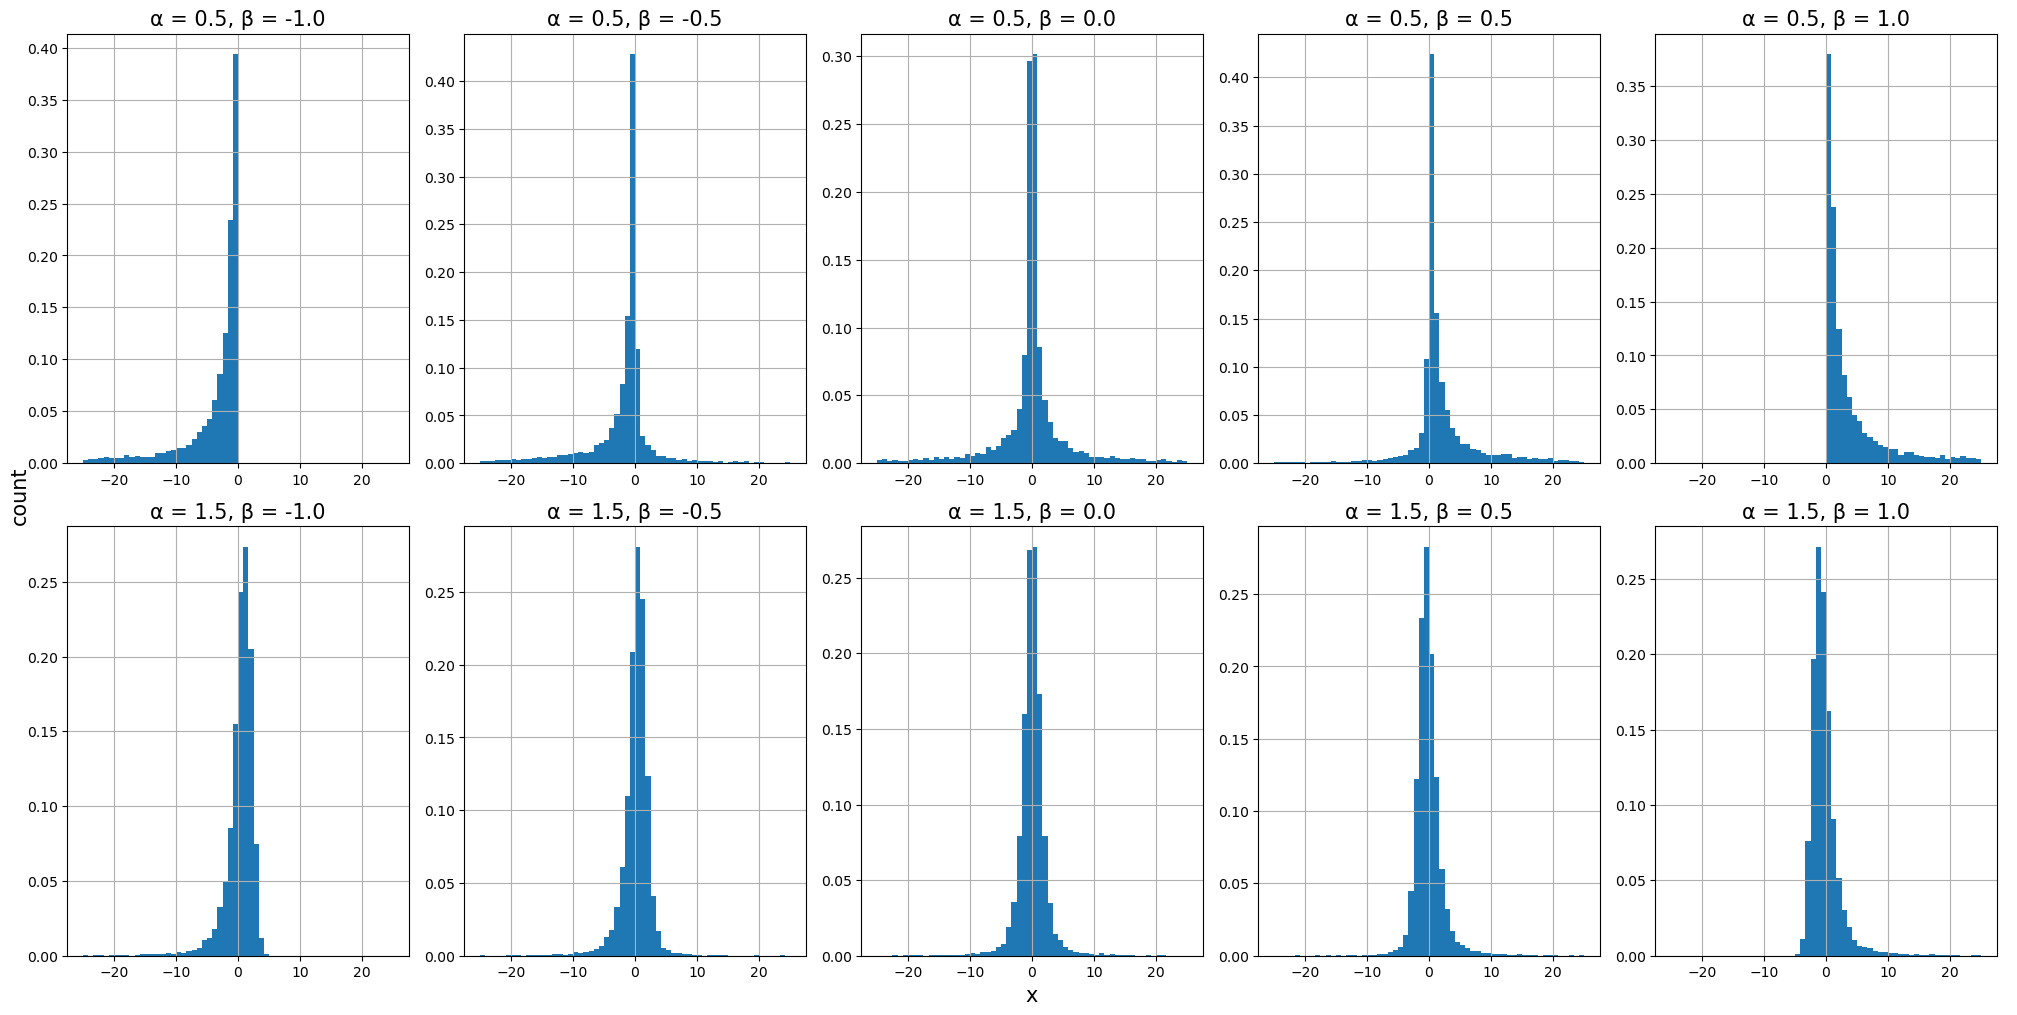

In [80]:
# histogram density estimates with alpha = 0.5, 1.5 and several values of beta

N = 10000


fig, ax = plt.subplots(2,5,figsize=(20,10))


# N uniform random variable btw -pi/2 and pi/2
# u = np.pi * np.random.rand(N) - np.pi/2
u = np.random.uniform(-np.pi/2,np.pi/2,N)
# N exponential random variable with mean 1
v = np.random.exponential(scale=1.0, size = N)

def b(alpha, beta):
    # result = (1/alpha)*(np.arctan(beta*(np.pi*alpha/2)))
    result = (1/alpha) * np.arctan(beta * np.tan(np.pi * alpha / 2))
    return result

def s(alpha, beta):
    # result = (1+(beta**2)*((np.tan(np.pi*alpha/2))**2))**(1/(2*alpha))
    result = (1 + beta**2 * (np.tan(np.pi * alpha / 2)) ** 2) ** (1 / (2 * alpha))
    return result

def x(alpha, b, s):
    # bracket1 = (np.sin(alpha*(u+b)))/((np.cos(u))**(1/alpha))
    # bracket2 = (np.cos(u-alpha*(u+b))/v)**((1-alpha)/alpha)
    # result = s*bracket1*bracket2
    result = s * np.sin(alpha * (u + b)) / (np.cos(u))**(1/alpha) * (np.cos(u - alpha * (u+b))/v) ** ((1-alpha)/alpha)
    return result

alpha = 0.5
beta = -1.0
# use u and v to calc x
x1 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 0.5
beta = -0.5
# use u and v to calc x
x2 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 0.5
beta = 0.0
# use u and v to calc x
x3 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 0.5
beta = 0.5
# use u and v to calc x
x4 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 0.5
beta = 1.0
# use u and v to calc x
x5 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 1.5
beta = -1.0
# use u and v to calc x
x6 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 1.5
beta = -0.5
# use u and v to calc x
x7 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 1.5
beta = 0.0
# use u and v to calc x
x8 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 1.5
beta = 0.5
# use u and v to calc x
x9 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 1.5
beta = 1.0
# use u and v to calc x
x10 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 1.01
beta = 0.0
# use u and v to calc x
x11 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 1.99
beta = 0.0
# use u and v to calc x
x12 = x(alpha,b(alpha,beta),s(alpha,beta))

# histogramming x
ax[0,0].hist(x1, bins=60, range=(-25, 25), density=True)
ax[0,1].hist(x2, bins=60, range=(-25, 25), density=True)
ax[0,2].hist(x3, bins=60, range=(-25, 25), density=True)
ax[0,3].hist(x4, bins=60, range=(-25, 25), density=True)
ax[0,4].hist(x5, bins=60, range=(-25, 25), density=True)
ax[1,0].hist(x6, bins=60, range=(-25, 25), density=True)
ax[1,1].hist(x7, bins=60, range=(-25, 25), density=True)
ax[1,2].hist(x8, bins=60, range=(-25, 25), density=True)
ax[1,3].hist(x9, bins=60, range=(-25, 25), density=True)
ax[1,4].hist(x10, bins=60, range=(-25, 25), density=True)

# fig.suptitle('Histogram density estimates with α = 0.5, 1.5 and several values of β', fontsize=15)
ax[0,0].set_title("α = 0.5, β = -1.0", fontsize=15)
ax[0,1].set_title("α = 0.5, β = -0.5", fontsize=15)
ax[0,2].set_title("α = 0.5, β = 0.0", fontsize=15)
ax[0,3].set_title("α = 0.5, β = 0.5", fontsize=15)
ax[0,4].set_title("α = 0.5, β = 1.0", fontsize=15)
ax[1,0].set_title("α = 1.5, β = -1.0", fontsize=15)
ax[1,1].set_title("α = 1.5, β = -0.5", fontsize=15)
ax[1,2].set_title("α = 1.5, β = 0.0", fontsize=15)
ax[1,3].set_title("α = 1.5, β = 0.5", fontsize=15)
ax[1,4].set_title("α = 1.5, β = 1.0", fontsize=15)


ax[0,0].grid()
ax[0,1].grid()
ax[0,2].grid()
ax[0,3].grid()
ax[0,4].grid()
ax[1,0].grid()
ax[1,1].grid()
ax[1,2].grid()
ax[1,3].grid()
ax[1,4].grid()

fig.tight_layout()
# plt.subplots_adjust(top=0.9)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("x",fontsize = 15)
plt.ylabel("count",fontsize = 15)

plt.show()

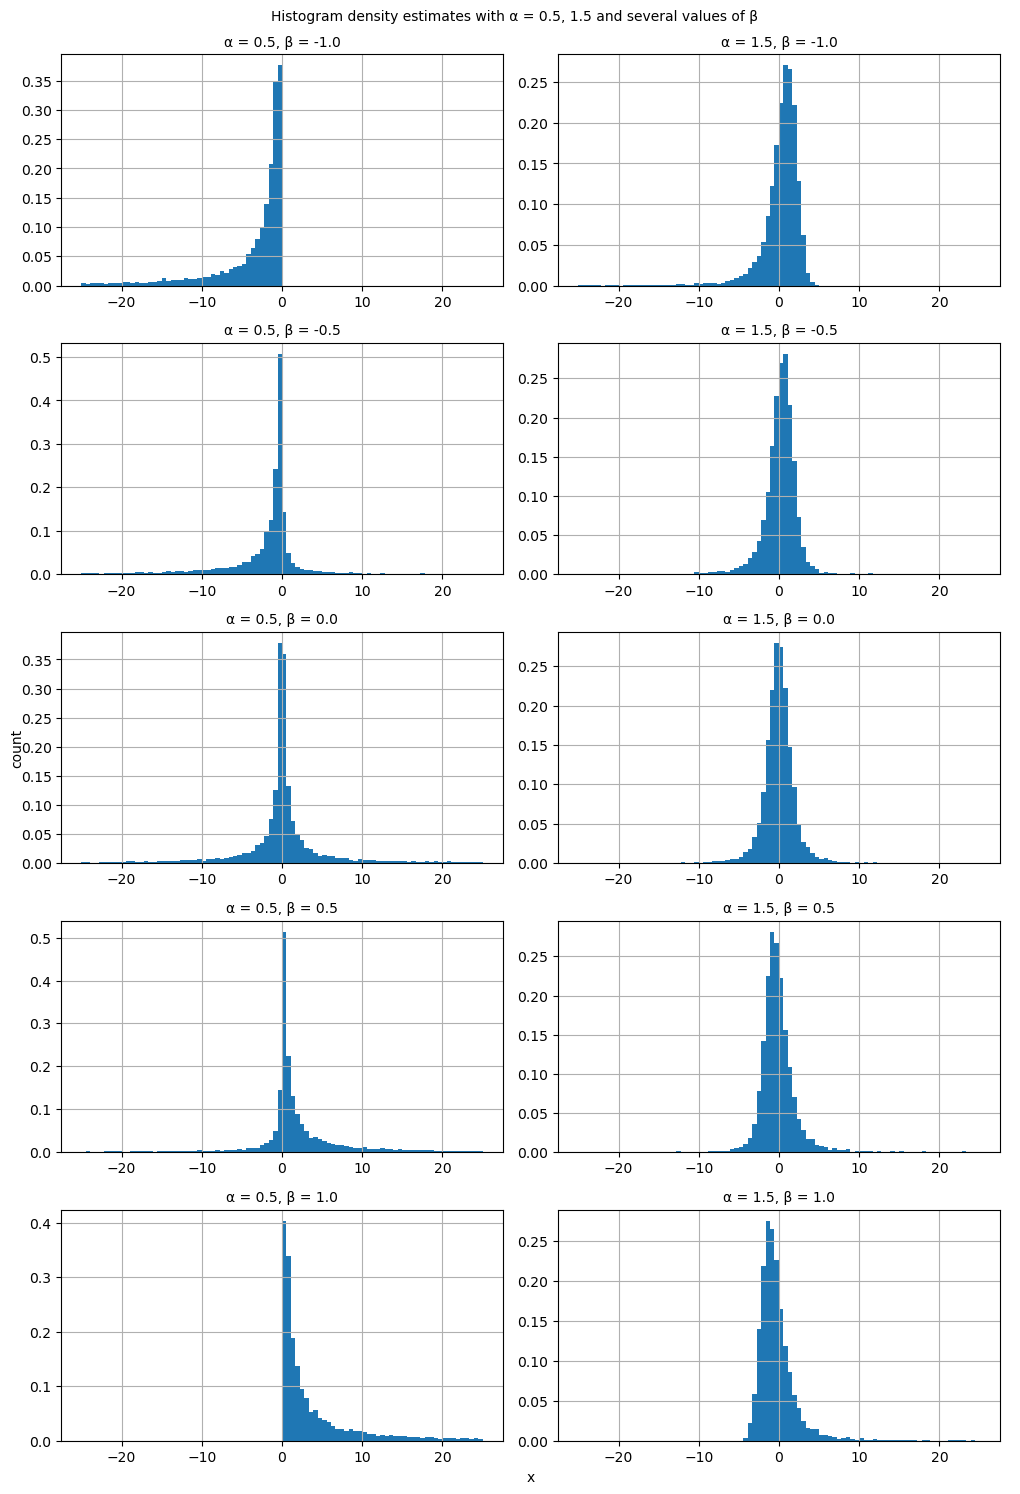

In [28]:
# histogram density estimates with alpha = 0.5, 1.5 and several values of beta

N = 10000


fig, ax = plt.subplots(5,2,figsize=(10,15))


# N uniform random variable btw -pi/2 and pi/2
# u = np.pi * np.random.rand(N) - np.pi/2
u = np.random.uniform(-np.pi/2,np.pi/2,N)
# N exponential random variable with mean 1
v = np.random.exponential(scale=1.0, size = N)

def b(alpha, beta):
    # result = (1/alpha)*(np.arctan(beta*(np.pi*alpha/2)))
    result = (1/alpha) * np.arctan(beta * np.tan(np.pi * alpha / 2))
    return result

def s(alpha, beta):
    # result = (1+(beta**2)*((np.tan(np.pi*alpha/2))**2))**(1/(2*alpha))
    result = (1 + beta**2 * (np.tan(np.pi * alpha / 2)) ** 2) ** (1 / (2 * alpha))
    return result

def x(alpha, b, s):
    # bracket1 = (np.sin(alpha*(u+b)))/((np.cos(u))**(1/alpha))
    # bracket2 = (np.cos(u-alpha*(u+b))/v)**((1-alpha)/alpha)
    # result = s*bracket1*bracket2
    result = s * np.sin(alpha * (u + b)) / (np.cos(u))**(1/alpha) * (np.cos(u - alpha * (u+b))/v) ** ((1-alpha)/alpha)
    return result

alpha = 0.5
beta = -1.0
# use u and v to calc x
x1 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 0.5
beta = -0.5
# use u and v to calc x
x2 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 0.5
beta = 0.0
# use u and v to calc x
x3 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 0.5
beta = 0.5
# use u and v to calc x
x4 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 0.5
beta = 1.0
# use u and v to calc x
x5 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 1.5
beta = -1.0
# use u and v to calc x
x6 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 1.5
beta = -0.5
# use u and v to calc x
x7 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 1.5
beta = 0.0
# use u and v to calc x
x8 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 1.5
beta = 0.5
# use u and v to calc x
x9 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 1.5
beta = 1.0
# use u and v to calc x
x10 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 1.01
beta = 0.0
# use u and v to calc x
x11 = x(alpha,b(alpha,beta),s(alpha,beta))

alpha = 1.99
beta = 0.0
# use u and v to calc x
x12 = x(alpha,b(alpha,beta),s(alpha,beta))

# histogramming x
ax[0,0].hist(x1, bins=90, range=(-25, 25), density=True)
ax[1,0].hist(x2, bins=90, range=(-25, 25), density=True)
ax[2,0].hist(x3, bins=90, range=(-25, 25), density=True)
ax[3,0].hist(x4, bins=90, range=(-25, 25), density=True)
ax[4,0].hist(x5, bins=90, range=(-25, 25), density=True)
ax[0,1].hist(x6, bins=90, range=(-25, 25), density=True)
ax[1,1].hist(x7, bins=90, range=(-25, 25), density=True)
ax[2,1].hist(x8, bins=90, range=(-25, 25), density=True)
ax[3,1].hist(x9, bins=90, range=(-25, 25), density=True)
ax[4,1].hist(x10, bins=90, range=(-25, 25), density=True)

fig.suptitle('Histogram density estimates with α = 0.5, 1.5 and several values of β', fontsize=10)
ax[0,0].set_title("α = 0.5, β = -1.0", fontsize=10)
ax[1,0].set_title("α = 0.5, β = -0.5", fontsize=10)
ax[2,0].set_title("α = 0.5, β = 0.0", fontsize=10)
ax[3,0].set_title("α = 0.5, β = 0.5", fontsize=10)
ax[4,0].set_title("α = 0.5, β = 1.0", fontsize=10)
ax[0,1].set_title("α = 1.5, β = -1.0", fontsize=10)
ax[1,1].set_title("α = 1.5, β = -0.5", fontsize=10)
ax[2,1].set_title("α = 1.5, β = 0.0", fontsize=10)
ax[3,1].set_title("α = 1.5, β = 0.5", fontsize=10)
ax[4,1].set_title("α = 1.5, β = 1.0", fontsize=10)


ax[0,0].grid()
ax[1,0].grid()
ax[2,0].grid()
ax[3,0].grid()
ax[4,0].grid()
ax[0,1].grid()
ax[1,1].grid()
ax[2,1].grid()
ax[3,1].grid()
ax[4,1].grid()

fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("x")
plt.ylabel("count")

plt.show()

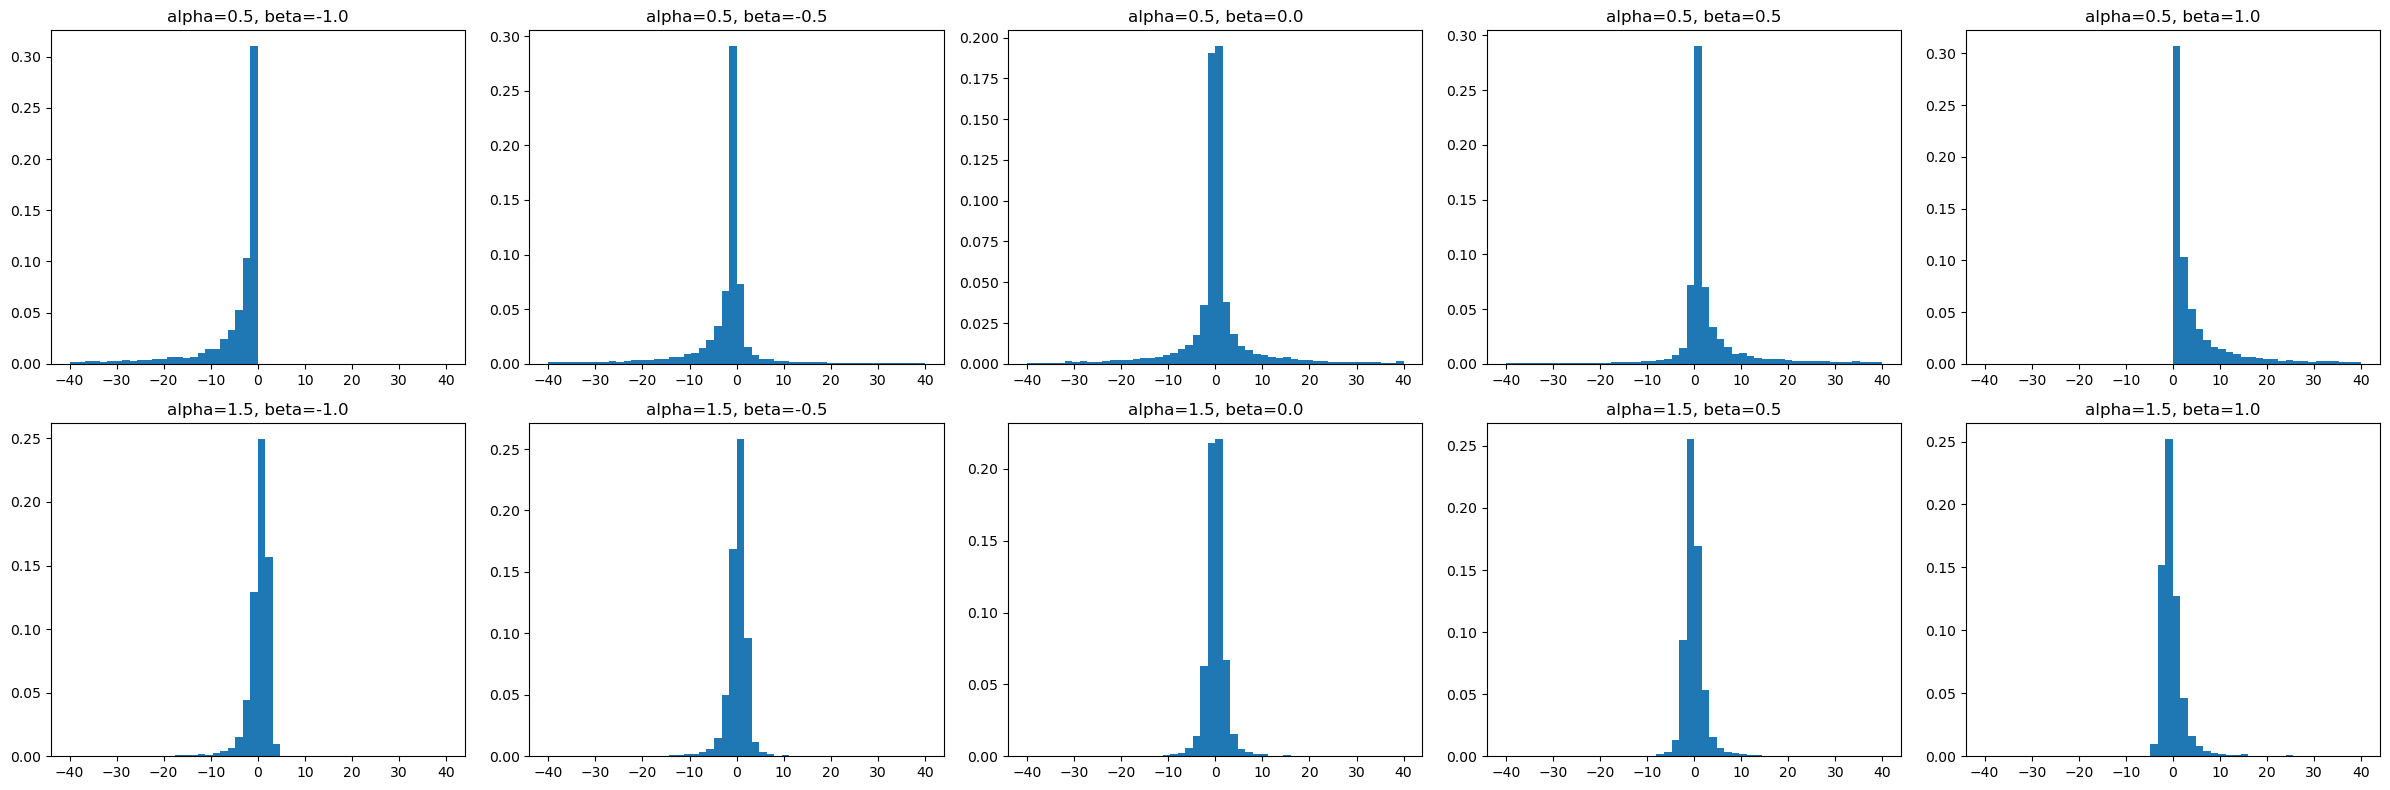

In [23]:
N = 10000
alpha_values = [0.5, 1.5]
beta_values = np.linspace(-1,1,5)


fig, axs = plt.subplots(len(alpha_values),len(beta_values), figsize=(24,8))

u = np.random.uniform(-np.pi/2,np.pi/2, N)
# N exponential random variable with mean 1
v = np.random.exponential(scale=1.0, size = N)

def calc_X(alpha, beta, N):

    b = (1/alpha) * np.arctan(beta * np.tan(np.pi * alpha / 2))
    s = (1 + beta**2 * (np.tan(np.pi * alpha / 2)) ** 2) ** (1 / (2 * alpha))
    X = s * np.sin(alpha * (u + b)) / (np.cos(u))**(1/alpha) * (np.cos(u - alpha * (u+b))/v) ** ((1-alpha)/alpha)
    return X

for i, alpha in enumerate(alpha_values):
    for j, beta in enumerate(beta_values):
        X = calc_X(alpha, beta, N)
        ax = axs[i,j]
        if alpha == 0.5:
            ax.hist(X,bins=50,density=True,range=(-40,40),label=f'$\\alpha$={alpha},$$\\beta$={beta}')
        else:
            ax.hist(X,bins=50,density=True,range=(-40,40),label=f'$\\alpha$={alpha},$$\\beta$={beta}')
        ax.set_title(f'alpha={alpha}, beta={beta}')

plt.tight_layout()
plt.show()

# peak increases for beta = 0 when alpha increases but peak decreases for beta = others when alpha increases

Estimate tail probability for alpha = 0.5, beta = 0

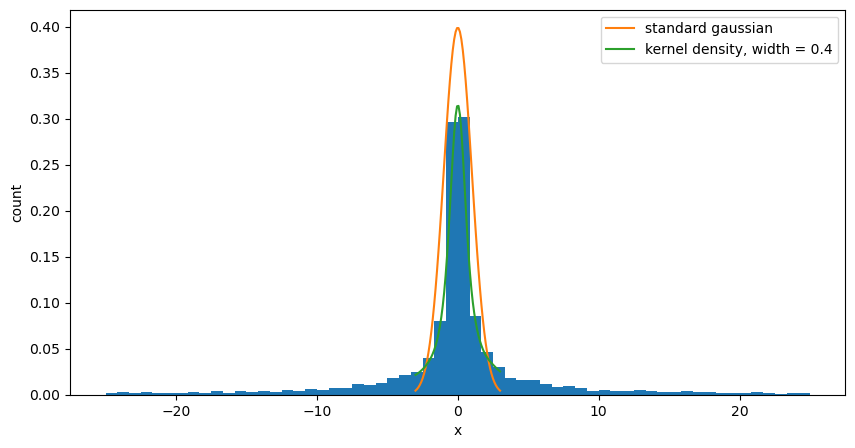

In [81]:
bins = 60
mu = 0
variance = 1

fig, ax = plt.subplots(figsize=(10,5))

# plot histogram
ax.hist(x3, bins=bins, range=(-25, 25), density=True)

# plot standard gaussian
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, bins)
#scale factor: no. of samples * bin width
ax.plot(x, stats.norm.pdf(x, mu, sigma), label = 'standard gaussian')
ks_density = ksdensity(x3, width=0.4)
ax.plot(x, ks_density(x), label = 'kernel density, width = 0.4')


plt.xlabel('x', fontsize=10)
plt.ylabel('count', fontsize=10)
# plt.title("Histogram density estimates with α = 0.5 and β = 0", fontsize = 10)
plt.legend()
plt.show()

In [82]:
for t in [3,6]:
    print(((x3>=t).sum()+(x3<=-t).sum())/len(x3))

0.3703
0.2789


Estimate tail probability for alpha = 1.0, beta = 0

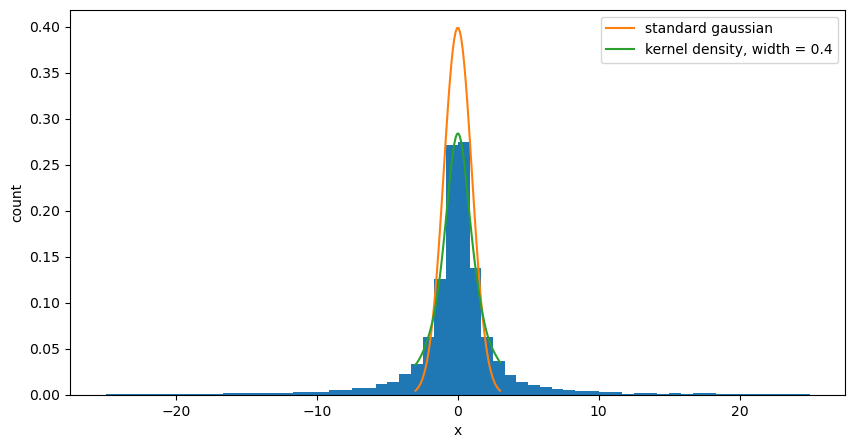

In [83]:
bins = 60
mu = 0
variance = 1

fig, ax = plt.subplots(figsize=(10,5))

# plot histogram
ax.hist(x11, bins=bins, range=(-25, 25), density=True)

# plot standard gaussian
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, bins)
#scale factor: no. of samples * bin width
ax.plot(x, stats.norm.pdf(x, mu, sigma), label = 'standard gaussian')
ks_density = ksdensity(x11, width=0.4)
ax.plot(x, ks_density(x), label = 'kernel density, width = 0.4')


plt.xlabel('x', fontsize=10)
plt.ylabel('count', fontsize=10)
# plt.title("Histogram density estimates with α = 1.01 and β = 0", fontsize = 10)
plt.legend()
plt.show()

In [84]:
for t in [3,6]:
    print(((x11>=t).sum()+(x11<=-t).sum())/len(x11))

0.1994
0.1022


Estimate tail probability for alpha = 1.5, beta = 0

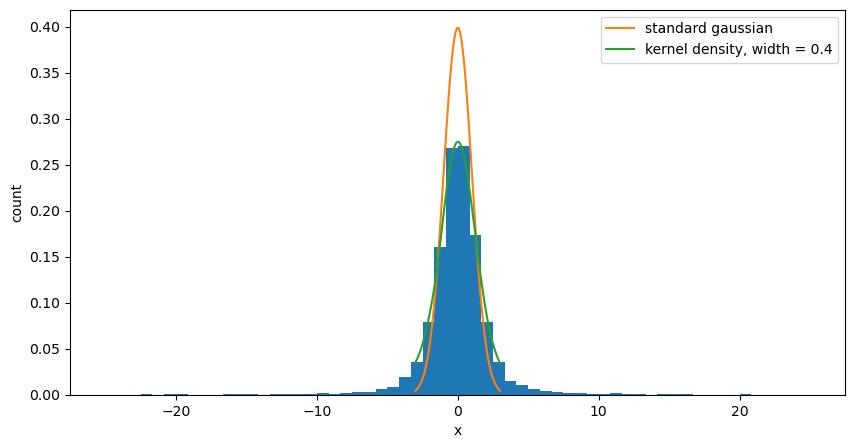

In [85]:
bins = 60
mu = 0
variance = 1

fig, ax = plt.subplots(figsize=(10,5))

# plot histogram
ax.hist(x8, bins=bins, range=(-25, 25), density=True)

# plot standard gaussian
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, bins)
#scale factor: no. of samples * bin width
ax.plot(x, stats.norm.pdf(x, mu, sigma), label = 'standard gaussian')
ks_density = ksdensity(x8, width=0.4)
ax.plot(x, ks_density(x), label = 'kernel density, width = 0.4')

plt.xlabel('x', fontsize=10)
plt.ylabel('count', fontsize=10)
# plt.title("Histogram density estimates with α = 1.5 and β = 0", fontsize = 10)
plt.legend()
plt.show()

In [86]:
for t in [3,6]:
    print(((x8>=t).sum()+(x8<=-t).sum())/len(x8))

0.1021
0.03


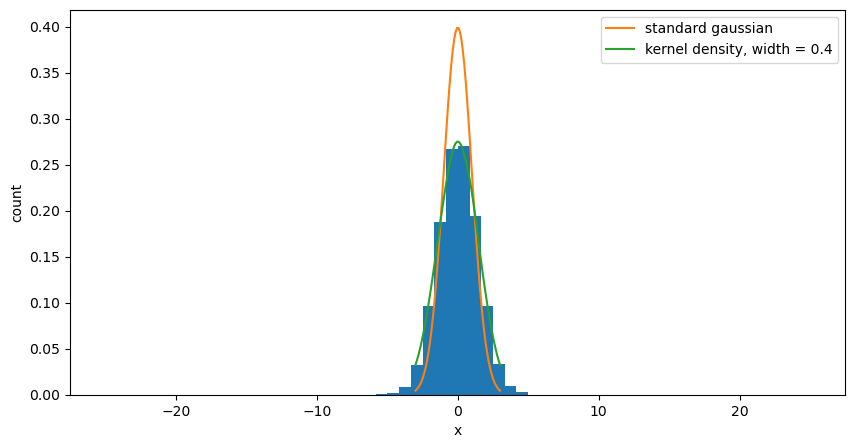

In [87]:
bins = 60
mu = 0
variance = 1

fig, ax = plt.subplots(figsize=(10,5))

# plot histogram
ax.hist(x12, bins=bins, range=(-25, 25), density=True)

# plot standard gaussian
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, bins)
#scale factor: no. of samples * bin width
ax.plot(x, stats.norm.pdf(x, mu, sigma), label = 'standard gaussian')
ks_density = ksdensity(x12, width=0.4)
ax.plot(x, ks_density(x), label = 'kernel density, width = 0.4')


plt.xlabel('x', fontsize=10)
plt.ylabel('count', fontsize=10)
# plt.title("Histogram density estimates with α = 1.99 and β = 0", fontsize = 10)
plt.legend()
plt.show()

In [90]:
for t in [3,6]:
    print(((x12>=t).sum()+(x12<=-t).sum())/len(x12))

0.0341
0.0


C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_18188\2708853682.py:5: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 0.5')
C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_18188\2708853682.py:7: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.01')
C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_18188\2708853682.py:9: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.5')
C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_18188\2708853682.py:11: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.99')


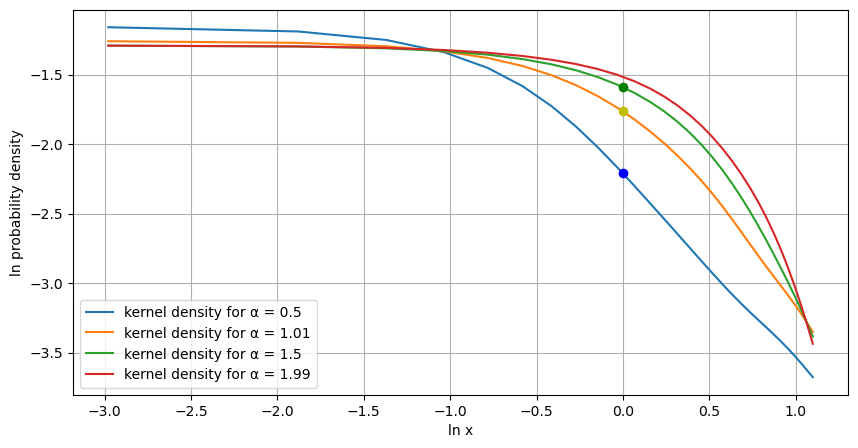

In [165]:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, bins)

fig, ax = plt.subplots(figsize=(10,5))
ks_density = ksdensity(x3, width=0.4)
ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 0.5')
ks_density = ksdensity(x11, width=0.4)
ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.01')
ks_density = ksdensity(x8, width=0.4)
ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.5')
ks_density = ksdensity(x12, width=0.4)
ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.99')

ax.plot(0,-2.209,'bo') 
ax.plot(0,-1.761,'yo') 
ax.plot(0,-1.591,'go') 



ax.grid()

# plt.title("log of kernel density estimates against log x for various α values", fontsize = 10)
plt.xlabel('ln x', fontsize=10)
plt.ylabel('ln probability density', fontsize=10)
plt.legend()
plt.show()



C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_18188\152034243.py:5: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 0.5')
C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_18188\152034243.py:7: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.01')
C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_18188\152034243.py:9: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.5')
C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_18188\152034243.py:11: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.99')


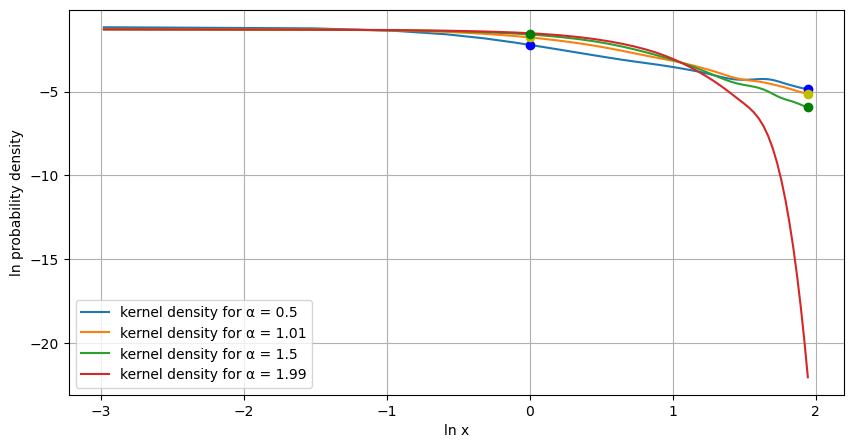

In [163]:
x = np.linspace(mu - 3*sigma, mu + 7*sigma, bins)

fig, ax = plt.subplots(figsize=(10,5))
ks_density = ksdensity(x3, width=0.4)
ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 0.5')
ks_density = ksdensity(x11, width=0.4)
ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.01')
ks_density = ksdensity(x8, width=0.4)
ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.5')
ks_density = ksdensity(x12, width=0.4)
ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.99')

ax.plot(0,-2.209,'bo') 
ax.plot(0,-1.761,'yo') 
ax.plot(0,-1.591,'go') 

ax.plot(1.95,-4.85,'bo') 
ax.plot(1.95,-5.15,'yo') 
ax.plot(1.95,-5.95,'go') 

ax.grid()

# plt.title("ln of kernal of kernel density estimates for various α values", fontsize = 10)
plt.xlabel('ln x', fontsize=10)
plt.ylabel('ln probability density', fontsize=10)
plt.legend()
plt.show()

C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_18188\1514822483.py:5: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 0.5')
C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_18188\1514822483.py:7: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.01')
C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_18188\1514822483.py:9: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.5')
C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_18188\1514822483.py:11: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.99')


[ 7.70727652e-01 -5.03800939e-01  4.75729107e-02 ...  9.54109305e-01
  7.59618542e+01 -6.04063107e-02]


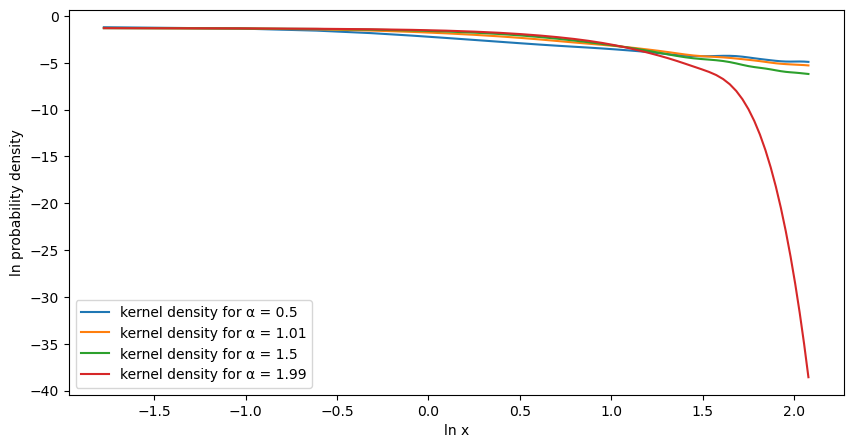

In [100]:
x = np.linspace(mu - 3*sigma, mu + 8*sigma, bins)

fig, ax = plt.subplots(figsize=(10,5))
ks_density = ksdensity(x3, width=0.4)
ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 0.5')
ks_density = ksdensity(x11, width=0.4)
ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.01')
ks_density = ksdensity(x8, width=0.4)
ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.5')
ks_density = ksdensity(x12, width=0.4)
ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.99')

print(x11)

# plt.title("ln of kernal of kernel density estimates for various α values", fontsize = 10)
plt.xlabel('ln x', fontsize=10)
plt.ylabel('ln probability density', fontsize=10)
plt.legend()
plt.show()

C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_18188\394982656.py:5: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 0.5')
C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_18188\394982656.py:7: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.01')
C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_18188\394982656.py:9: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.5')
C:\Users\Yuxuan Xie\AppData\Local\Temp\ipykernel_18188\394982656.py:11: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.99')


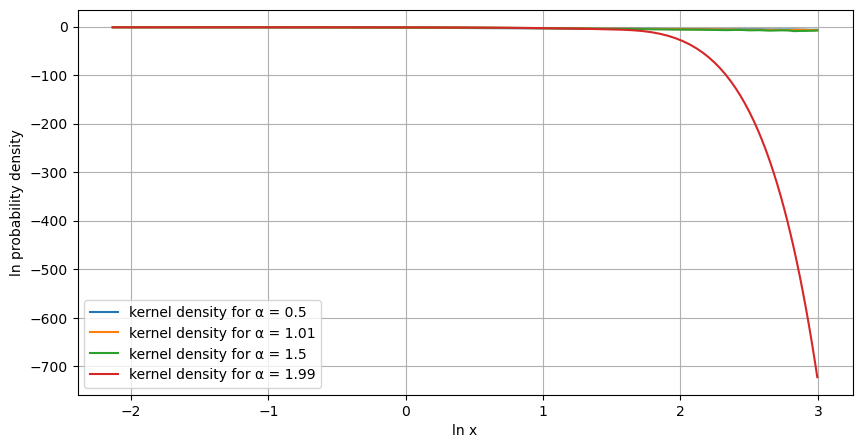

In [171]:
x = np.linspace(mu - 3*sigma, mu + 20*sigma, bins)

fig, ax = plt.subplots(figsize=(10,5))
ks_density = ksdensity(x3, width=0.4)
ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 0.5')
ks_density = ksdensity(x11, width=0.4)
ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.01')
ks_density = ksdensity(x8, width=0.4)
ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.5')
ks_density = ksdensity(x12, width=0.4)
ax.plot(np.log(x), np.log(ks_density(x)),label='kernel density for α = 1.99')


# plt.title("ln of kernal of kernel density estimates for various α values", fontsize = 10)
plt.xlabel('ln x', fontsize=10)
plt.ylabel('ln probability density', fontsize=10)
plt.legend()
plt.grid()
plt.show()